## Orden en funciones con ejemplo: Cruce de medias

In [17]:
import yfinance as yf
import pandas as pd

### Función para traer datos

#### Para traer un solo ticker por vez

In [18]:
def getData(symbol, start='2000-01-01', interval='1d', end=None):
    data = yf.download(symbol, start=start, end=end, interval=interval, auto_adjust=True)
    return data

#### Para traer multiples tickers, batch requests etc

In [23]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [19]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [t for t in sp500_tickers if t not in ['BRK.B' ,'BF.B']]

In [20]:
def getDataM(listado, start='2000-01-01', interval='1d', end=None):
    data = yf.download(listado, start=start, end=end, interval=interval, auto_adjust=True)
    return data.swaplevel(i=1, j=0, axis=1)

In [21]:
df_sp500 = getDataM(sp500_tickers)

[*********************100%***********************]  503 of 503 downloaded


In [24]:
df_sp500

,ABC,CF,HFC,ROK,SO,A,AAL,AAP,AAPL,ABBV,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Close,Close,Close,Close,Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,44.68,NaN,NaN,3.45,NaN,...,7698700.0,13458200.0,582200.0,3329100.0,NaN,3033400.0,NaN,1055700.0,1199600.0,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,41.27,NaN,NaN,3.16,NaN,...,7399600.0,14510800.0,317600.0,2361900.0,NaN,3315000.0,NaN,522400.0,816100.0,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,38.71,NaN,NaN,3.21,NaN,...,6607300.0,17485000.0,1188000.0,2375400.0,NaN,4642600.0,NaN,612100.0,1124700.0,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,37.24,NaN,NaN,2.93,NaN,...,8556600.0,19461600.0,534200.0,1650100.0,NaN,3947600.0,NaN,263800.0,1112100.0,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,40.34,NaN,NaN,3.07,NaN,...,10617800.0,16603800.0,1401000.0,2366900.0,NaN,6063600.0,NaN,333900.0,782000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-10,NaN,NaN,NaN,NaN,NaN,97.14,14.00,153.32,450.91,92.38,...,1869700.0,24367800.0,1574400.0,6077600.0,959200.0,1087400.0,1037500.0,223200.0,1694000.0,1393200.0
2020-08-11,NaN,NaN,NaN,NaN,NaN,96.30,13.73,151.94,437.50,92.67,...,2077000.0,28987500.0,1898300.0,3338100.0,942400.0,1429100.0,884900.0,183300.0,1696700.0,1136700.0


In [31]:
df_sp500['AMZN']

,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,89.38,89.56,79.05,81.50,16117600.0
2000-01-04,81.94,91.50,81.75,85.38,17487400.0
2000-01-05,69.75,75.12,68.00,70.50,38457400.0
2000-01-06,65.56,72.69,64.00,71.31,18752000.0
2000-01-07,69.56,70.50,66.19,67.00,10505400.0
...,...,...,...,...,...
2020-08-10,3148.16,3172.51,3101.52,3170.31,3167300.0
2020-08-11,3080.67,3159.22,3073.00,3113.20,3718100.0
2020-08-12,3162.24,3174.39,3101.42,3108.00,3527200.0


In [25]:
tickers_ADRS = ['GGAL','YPF']
data_ADRS = yf.download(tickers_ADRS)
data_ADRS

[*********************100%***********************]  2 of 2 downloaded


Adj Close        Close          High           Low          Open  \
                GGAL   YPF   GGAL    YPF   GGAL    YPF   GGAL    YPF   GGAL   
Date                                                                          
1993-06-29       NaN  5.18    NaN  21.88    NaN  22.12    NaN  21.12    NaN   
1993-06-30       NaN  5.15    NaN  21.75    NaN  23.00    NaN  21.62    NaN   
1993-07-01       NaN  5.03    NaN  21.25    NaN  21.62    NaN  21.00    NaN   
1993-07-02       NaN  5.00    NaN  21.12    NaN  21.25    NaN  20.75    NaN   
1993-07-06       NaN  4.92    NaN  20.75    NaN  21.00    NaN  20.62    NaN   
...              ...   ...    ...    ...    ...    ...    ...    ...    ...   
2020-08-10     12.44  6.24  12.44   6.24  13.22   6.55  12.37   6.20  12.61   
2020-08-11     11.86  5.90  11.86   5.90  12.68   6.30  11.82   5.86  12.60   
2020-08-12     11.46  5.57  11.46   5.57  12.24   6.00  11.22   5.48  12.15   
2020-08-13     11.53  5.66  11.53   5.66  11.97   5.77  11.29   5.51  11.33   
2020-08-14     11.37  5.72  11.37   5.72  11.63   5.79  11.25   5.58  11.63   

                      Volume            
              YPF       GGAL       YPF  
Date                                    
1993-06-29  21.25        NaN  34346800  
1993-06-30  22.00        NaN   9060600  
1993-07-01  21.38        NaN   4273100  
1993-07-02  21.12        NaN   2504500  
1993-07-06  20.88        NaN   2030400  
...           ...        ...       ...  
2020-08-10   6.51   814800.0   1299600  
2020-08-11   6.10  1350100.0   2159700  
2020-08-12   6.00  1762700.0   2228600  
2020-08-13   5.51   918300.0   1860500  
2020-08-14   5.68   611699.0   1064549  

[6833 rows x 12 columns]

In [30]:
data_ADRS = yf.download(tickers_ADRS)

data_ADRS = data_ADRS.swaplevel(i=1, j=0, axis=1)
data_ADRS['GGAL']

[*********************100%***********************]  2 of 2 downloaded


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1993-06-29,NaN,NaN,NaN,NaN,NaN,NaN
1993-06-30,NaN,NaN,NaN,NaN,NaN,NaN
1993-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1993-07-02,NaN,NaN,NaN,NaN,NaN,NaN
1993-07-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-10,12.44,12.44,13.22,12.37,12.61,814800.0
2020-08-11,11.86,11.86,12.68,11.82,12.60,1350100.0
2020-08-12,11.46,11.46,12.24,11.22,12.15,1762700.0


### Función para crear señales

In [ ]:
def addSignal(data, fast=5, slow=20, rsi_q=14, buy_cr=1, buy_rsi=60, sell_cr=0.98, sell_rsi=35):
    
    data['Cruce'] = (data.Close.rolling(fast).mean() / data.Close.rolling(slow).mean() -1)*100
    
    dif = data['Close'].diff()
    win =  pd.DataFrame(np.where(dif > 0, dif, 0))
    loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
    ema_win = win.ewm(alpha=1/rsi_q).mean()
    ema_loss = loss.ewm(alpha=1/rsi_q).mean()
    rs = ema_win / ema_loss
    rsi = 100 - (100 / (1+rs))
    rsi.index = data.index
    data['rsi'] = rsi

    data['Señal'] = 'Sin Señal'
    comprar = (data.Cruce > buy_cr) & (data.rsi > buy_rsi)
    data.loc[comprar, 'Señal'] = 'Compra'

    vender = (data.Cruce < sell_cr) & (data.rsi < sell_rsi)
    data.loc[vender, 'Señal'] = 'Venta'
    
    return data

### Función para armar tabla de Trades

* Definir racional
* Manejo de posición
* Risk and money management

In [ ]:
def getTrades(data):
    
    # Una sola entrada y salida por vez
    trades = data.loc[data.Señal != 'Sin Señal'].copy()
    trades['Señal'] = np.where(trades.Señal != trades.Señal.shift(), trades.Señal,'Sin Señal')
    trades = trades.loc[trades.Señal != 'Sin Señal'].copy()
    
    # Supuesto estrategia long, debe empezar con compra y terminar con venta
    if trades.iloc[0,7]=='Venta':
        trades = trades.iloc[1:]

    if trades.iloc[-1,7]=='Compra':
        trades = trades.iloc[:-1]
    
    return(trades)

### Funciones de reporting

In [ ]:
def getYields(trades):
    precios_compra = trades.Close.iloc[::2].reset_index().Close
    precios_venta = trades.Close.iloc[1::2].reset_index().Close
    yields = precios_venta/precios_compra-1
    return yields

### Uso de todo esto

In [34]:
data = getData('AAPL')

[*********************100%***********************]  1 of 1 downloaded


In [35]:
df = addSignal(data,fast=5, slow=20, rsi_q=14, buy_cr=1, buy_rsi=70, sell_cr=0.98, sell_rsi=35)
trades = getTrades(df)
yields = getYields(trades)
resultado = round(float((((yields+1).cumprod()-1)*100)[-1:]))
print(resultado)

2089


In [40]:
df = addSignal(data,fast=5, slow=20, rsi_q=14, buy_cr=1, buy_rsi=54, sell_cr=0.98, sell_rsi=35)
trades = getTrades(df)
yields = getYields(trades)
resultado = round(float((((yields+1).cumprod()-1)*100)[-1:]))
print(resultado)

8947


## ¿Que me permite este orden?

* Sensibilidad/Parametrizacion
* Portabilidad

[*********************100%***********************]  1 of 1 downloaded


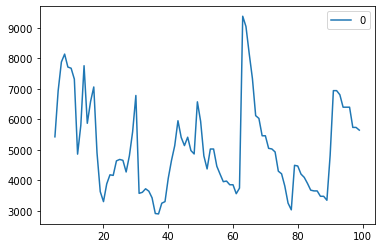

In [47]:
data = getData('AAPL')
results = []
for i in range(5,100):
    data = addSignal(data,fast=5, slow=20, rsi_q=i, buy_cr=1, buy_rsi=55, sell_cr=0.98, sell_rsi=45)
    trades = getTrades(data)
    yields = getYields(trades)
    resultado = round(float((((yields+1).cumprod()-1)*100)[-1:]))
    results.append(resultado)
    
df = pd.DataFrame(results, index=range(5,100))
df.plot()

In [48]:
df.idxmax()

0    63
dtype: int64

[*********************100%***********************]  1 of 1 downloaded


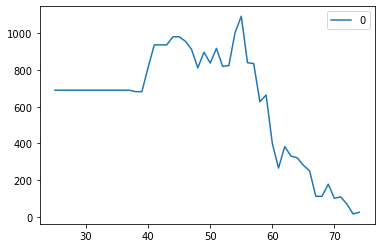

In [43]:
data = getData('YPF')
results = []
for i in range(25,75):
    data = addSignal(data,fast=5, slow=20, rsi_q=14, buy_cr=1, buy_rsi=i, sell_cr=0.98, sell_rsi=45)
    trades = getTrades(data)
    yields = getYields(trades)
    resultado = round(float((((yields+1).cumprod()-1)*100)[-1:]))
    results.append(resultado)
    
df = pd.DataFrame(results, index=range(25,75))
df.plot()

In [42]:
df.idxmax()

0    63
dtype: int64

In [50]:
results = []
for ticker in sp500_tickers:
    try:
        data = df_sp500[ticker].copy()
        df = addSignal(data,fast=5, slow=20, rsi_q=14, buy_cr=1, buy_rsi=70, sell_cr=0.98, sell_rsi=35)
        trades = getTrades(df)
        yields = getYields(trades)
        resultado = round(float((((yields+1).cumprod()-1)*100)[-1:]))
        results.append({'ticker':ticker, 'resultado':resultado})
        print(ticker,resultado, end='..')
    except:
        print('\n\nError con ',ticker,'\n\n')
    
results_df = pd.DataFrame(results)
results_df

MMM 36..ABT 59..ABBV 73..ABMD 677..ACN 96..ATVI 1492..ADBE 187..AMD 625..AAP 418..AES 331..AFL 246..A 63..APD 82..AKAM 949..ALK 215..ALB 180..ARE 167..ALXN 93..ALGN 835..ALLE 29..LNT 200..ALL 179..GOOGL 196..GOOG 113..MO 379..AMZN 1256..AMCR -7..AEE -8..AAL 6..AEP 50..AXP 270..AIG 26..AMT 1051..AWK 88..AMP 235..ABC 282..AME 130..AMGN 4..APH 172..ADI -12..ANSS 212..ANTM 111..AON 22..AOS 491..APA -69..AIV 114..AAPL 2089..AMAT 32..APTV 161..ADM 158..ANET 2..AJG 259..AIZ 193..T 17..ATO 107..ADSK 523..ADP 14..AZO 384..AVB 332..AVY 90..BKR -24..BLL 707..BAC 145..BK -27..BAX 124..BDX 25..BBY 845..BIO 215..BIIB 15..BLK 967..BA 407..BKNG 1689..BWA 168..BXP 70..BSX 34..BMY 35..AVGO 75..BR 84..CHRW -46..COG 322..CDNS -3..CPB -25..COF -29..CAH 79..KMX 1995..CCL -2..

Error con  CARR 


CAT 421..CBOE 144..CBRE 728..CDW 169..CE 149..CNC 212..CNP 218..CTL -30..CERN 376..CF 34..SCHW -55..CHTR 194..CVX 4..CMG 322..CB 48..CHD 158..CI 128..CINF 25..CTAS 132..CSCO 75..C 4..CFG 30..CTXS -49..CLX -28..CME 7

,ticker,resultado
0,MMM,36
1,ABT,59
2,ABBV,73
3,ABMD,677
4,ACN,96
...,...,...
494,YUM,208
495,ZBRA,29
496,ZBH,243
497,ZION,-54


In [53]:
results_df.sort_values('resultado')

,ticker,resultado
266,KSU,-92
441,TT,-83
428,TTWO,-78
204,GPS,-78
354,ORCL,-73
...,...,...
46,AAPL,2089
303,MA,2240
347,NVDA,2559
320,MNST,3026
